# Try again with CNN with Gramian Angular Difference Field
# Produce a dataset containing EventID that correspond to ...

In [36]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import sys

# plt.rcParams['figure.figsize'] = 12.0, 8.0

# arguments = sys.argv
# Run = arguments[0]
# SubRun = arguments[1]
# SubSubRun = arguments[2]

file = "RefPulse009.root"#.format(Run,SubRun,SubSubRun)
# file = "Run009/Run009-070-001.root"#.format2(Run,SubRun,SubSubRun)
# file = "Run009/Run009-079-001.root"
data = "PMTALL"
tree = "tree"
energy = "Energy"

CPU times: user 51 µs, sys: 18 µs, total: 69 µs
Wall time: 75.8 µs


In [37]:
%%time
from pyts.transformation import GADF, GASF

from sklearn.preprocessing import normalize
from root_numpy import tree2array,array2tree,array2root
import ROOT
import keras

# Slightly different , just the first 4096 of waveform(full 4480, for ease of operations)
def reader_pmt(path):
    extra = np.arange(4096, 4480)
    x_file = ROOT.TFile(path)
    x_tree = x_file.Get("tree")
    x_pmtall = tree2array(x_tree, branches="PMTALL")
    x = np.delete(x_pmtall, extra, axis=1)
    return x

def viewer(x):
    y = abs(x-15200)
    z = normalize(y, norm="l2")
    return z

import random
def generator(path):
    while 1:
        pmtall = reader_pmt(path)
        length = len(pmtall)
        gasf = GASF(image_size=64, overlapping=False, scale='-1')
        for i in range(length):
            p = np.expand_dims(pmtall[i],axis=0)
            p = gasf.transform(p)
            p = np.expand_dims(p,axis=3)
            yield p
            
test = generator(file)
print(next(test).shape)


(1, 64, 64, 1)
CPU times: user 352 ms, sys: 21.3 ms, total: 373 ms
Wall time: 435 ms


##### label = 0

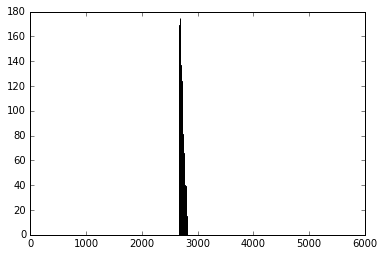

2014
Starts picking!
picked 4 events!


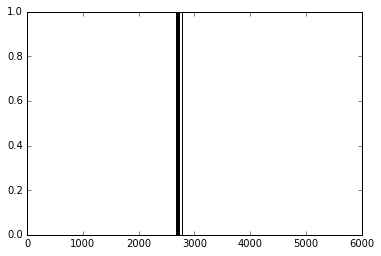

CPU times: user 24.5 s, sys: 3.39 s, total: 27.8 s
Wall time: 22.7 s


In [38]:
%%time

rfile = ROOT.TFile(file)
intree = rfile.Get(tree)
treer = tree2array(intree)
# pmtall = tree2array(intree, branches=data)
energy = tree2array(intree, branches=energy)

plt.figure()
plt.hist(energy[:,1],bins=np.arange(0,6000,5))
plt.show()

from keras.models import load_model

model = load_model("CNN_256_256_6_classes_noLS.h5")

steps=len(energy)
print(steps)

pred = model.predict_generator(generator(file),steps=steps)

indices = np.argmax(pred,axis=1)

print("Starts picking!")
picked = []
for i in range(len(energy)):
    if indices[i]==0: #and pred[i][0]>0.9:
        picked.append(i)
#         plt.figure()
#         plt.plot(np.arange(4096),pmtall[i])
#         plt.show()

# histogramming = treer[picked]
# array2root(histogramming, "PSD15out.root","tree")#.format(Run,SubRun,SubSubRun), "tree")

print("picked",len(picked), "events!")
plt.figure()
plt.hist(energy[picked,1],bins=np.arange(0,6000,5))
plt.show()

In [39]:
# Augment pmtall waveform for better viewing frame instead of inverted.
pmtall = reader_pmt(file)
pmtall = viewer(pmtall)


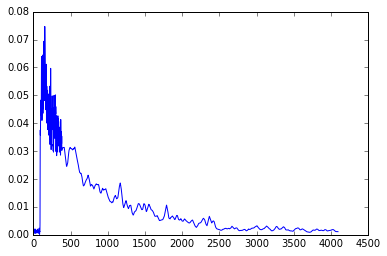

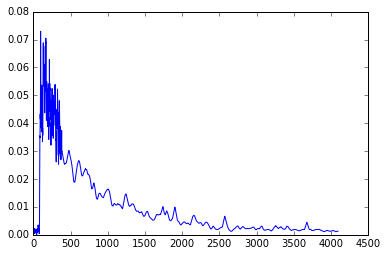

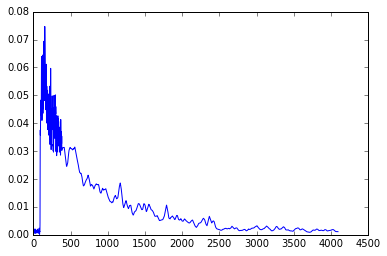

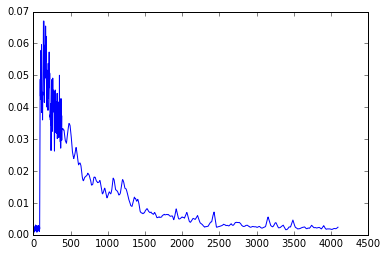

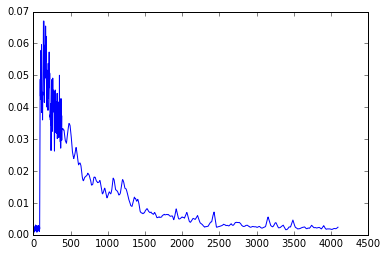

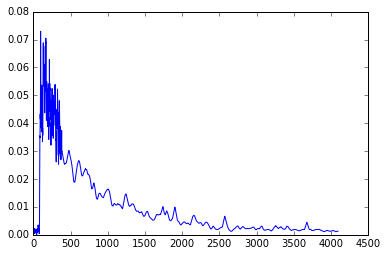

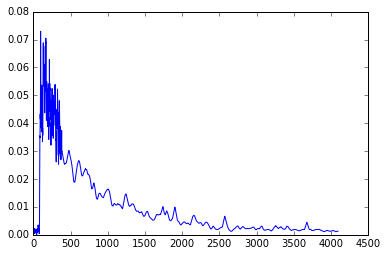

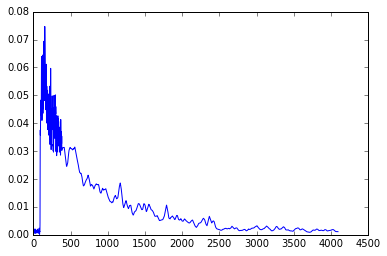

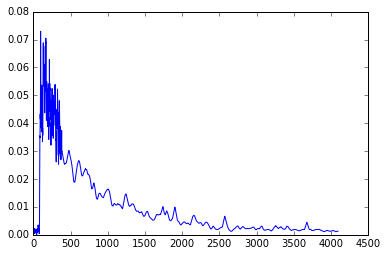

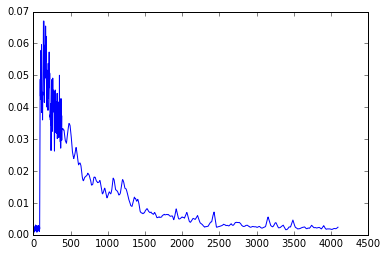

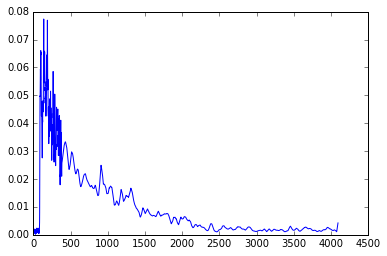

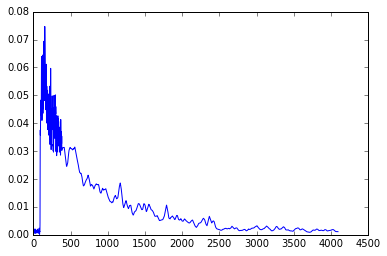

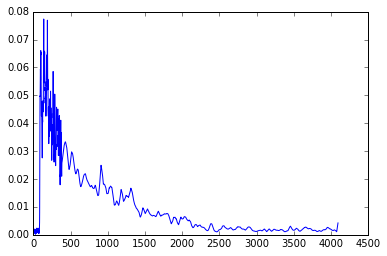

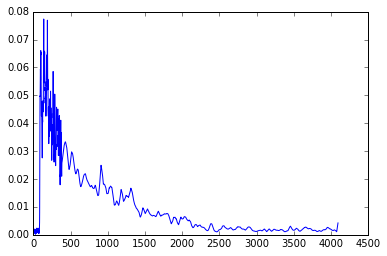

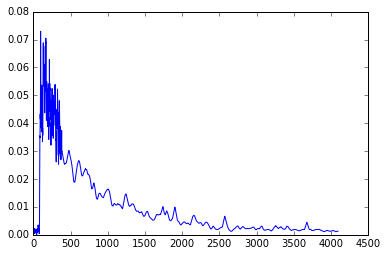

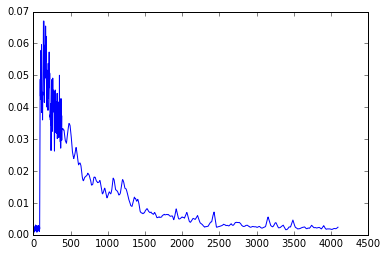

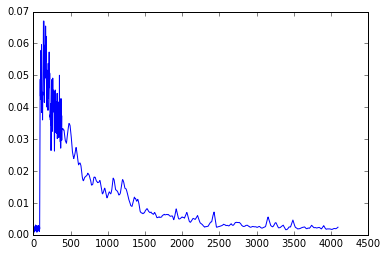

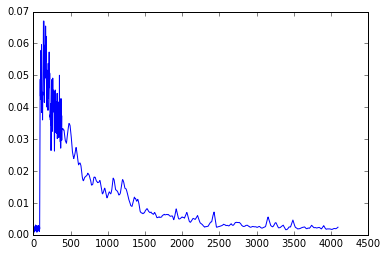

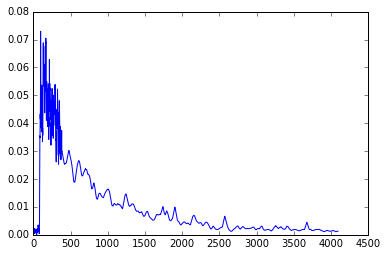

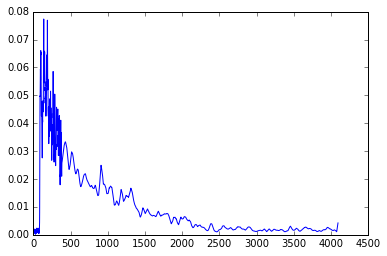

In [40]:
for i in range(20):
    k = np.random.randint(len(picked))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked[k]])
    plt.show()

##### label = 1

Starts picking!


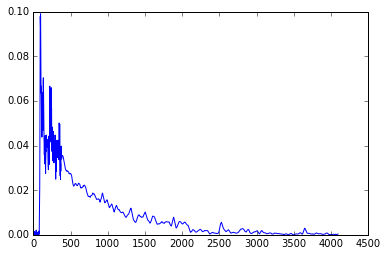

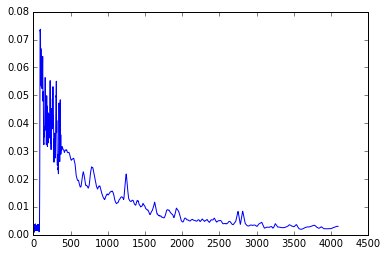

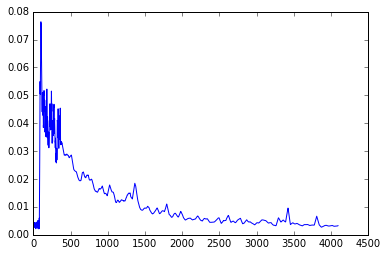

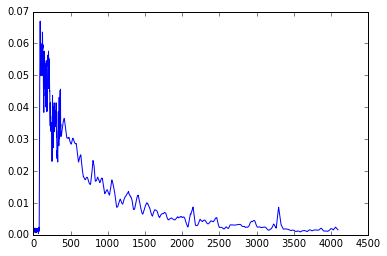

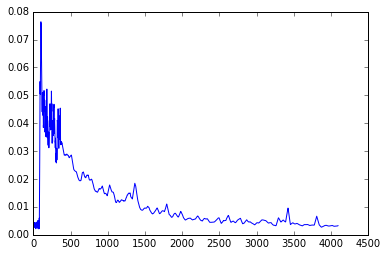

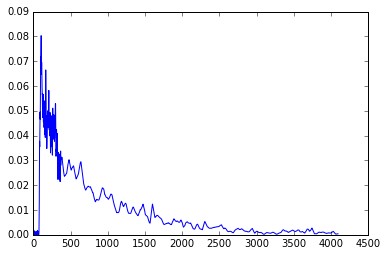

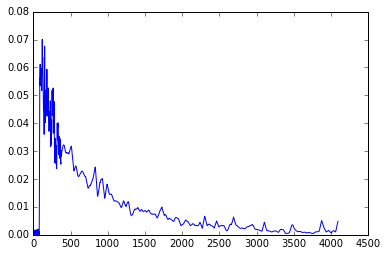

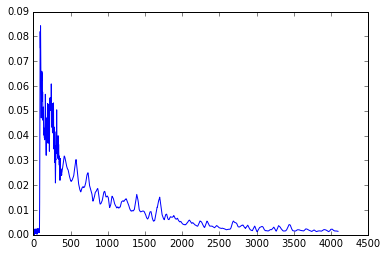

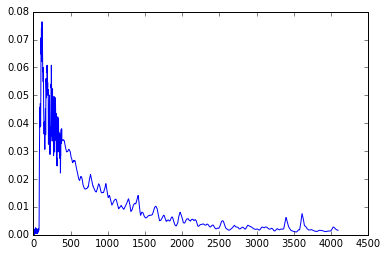

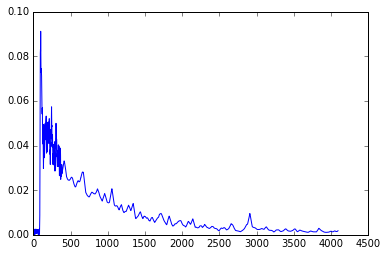

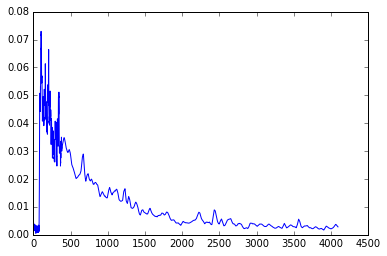

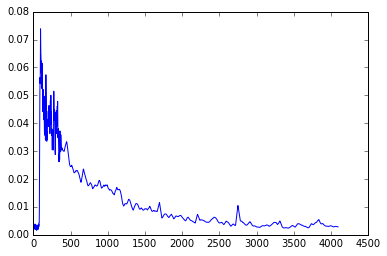

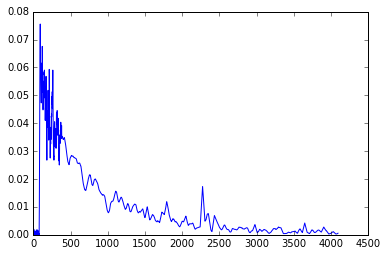

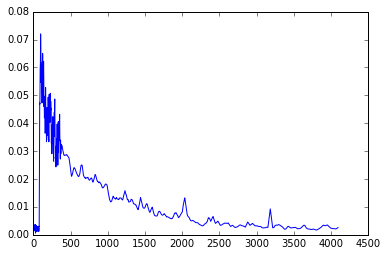

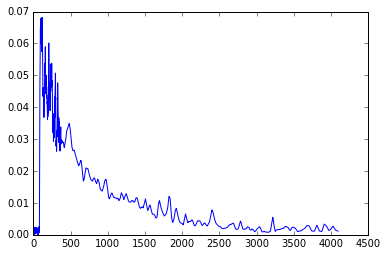

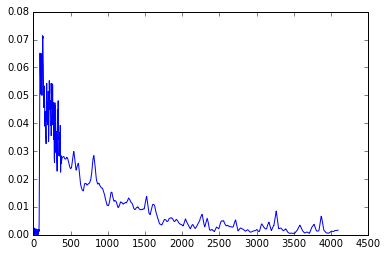

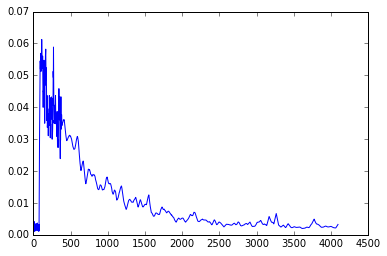

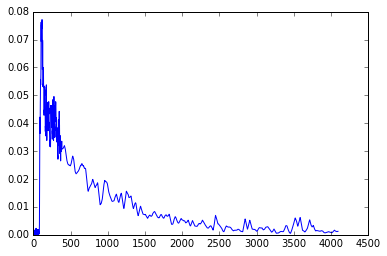

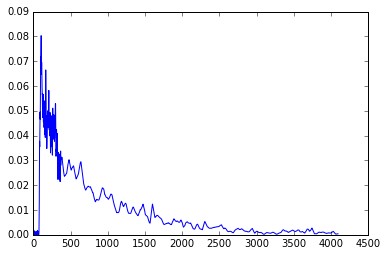

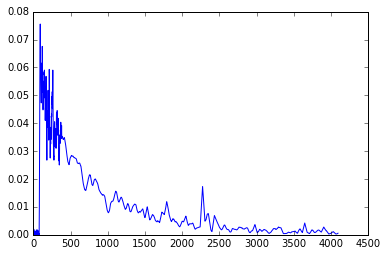

picked 55 events!


In [41]:
print("Starts picking!")
picked = []
for i in range(len(energy)):
    if indices[i]==1: #and pred[i][0]>0.9:
        picked.append(i)

for i in range(20):
    k = np.random.randint(len(picked))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked[k]])
    plt.show()
print("picked",len(picked), "events!")


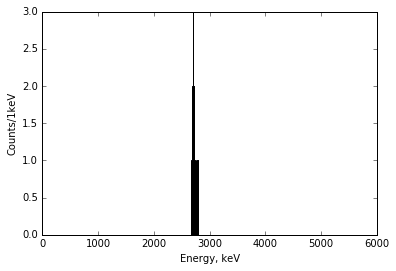

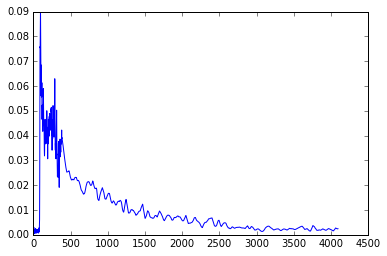

In [42]:
plt.figure()
plt.hist(energy[picked,1],bins=np.arange(0,6000,1))
plt.xlabel("Energy, keV")
plt.ylabel("Counts/1keV")
plt.savefig("lshisto.png")
plt.show()

plt.figure()
plt.plot(np.arange(4096),pmtall[picked[0]])
plt.savefig("LSwaveform.png")
plt.show()

##### label = 2

Starts picking!


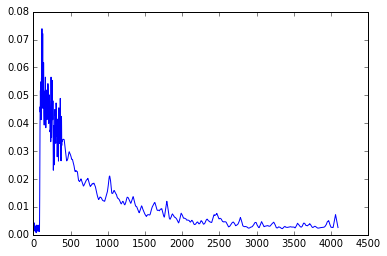

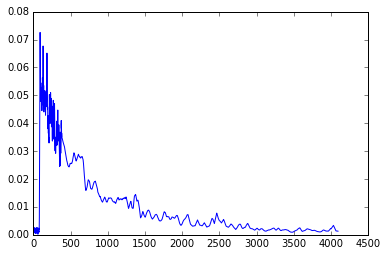

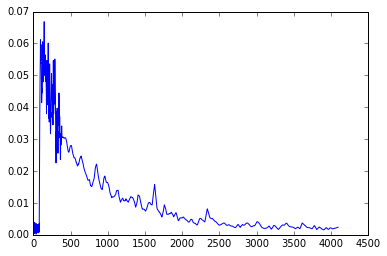

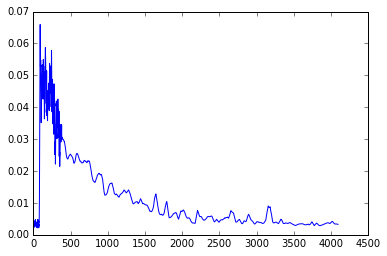

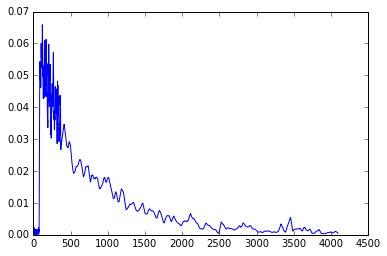

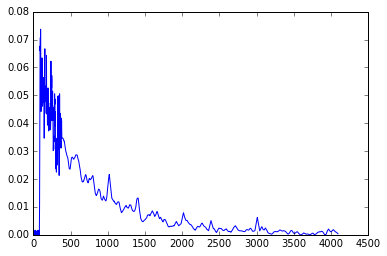

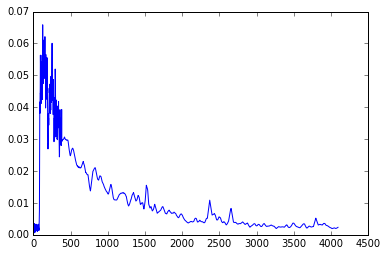

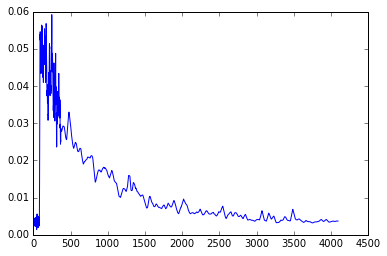

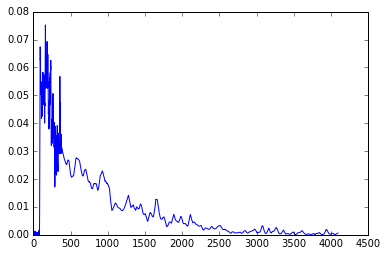

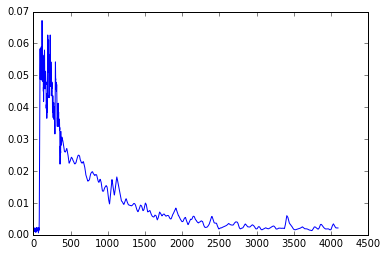

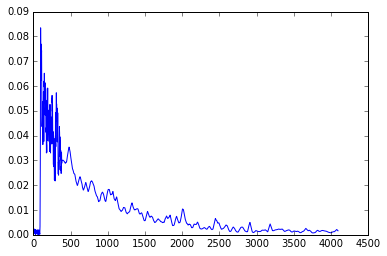

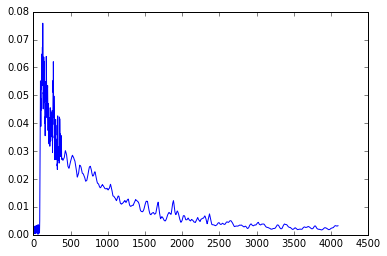

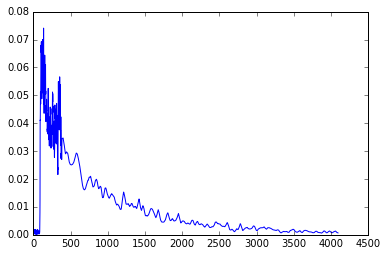

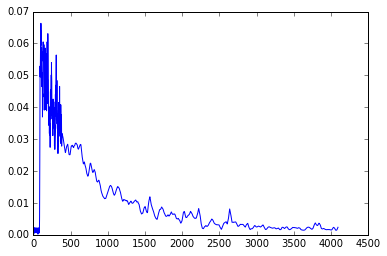

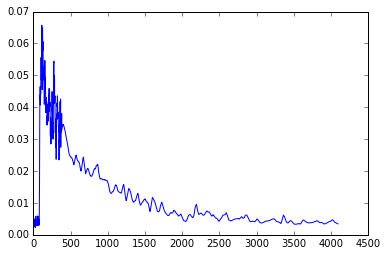

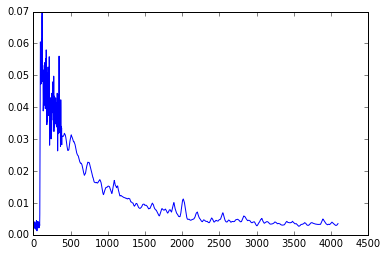

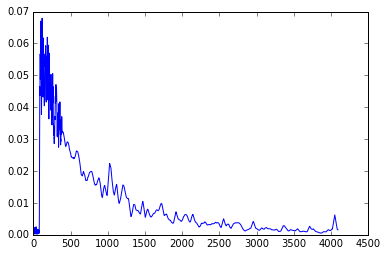

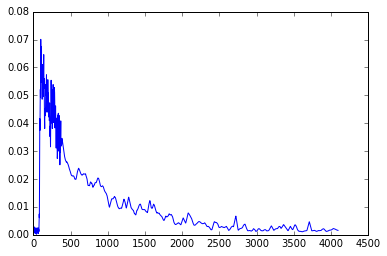

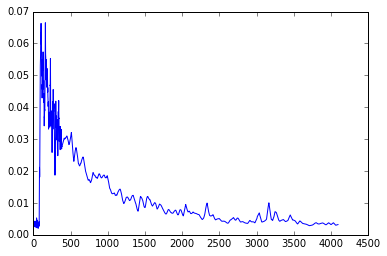

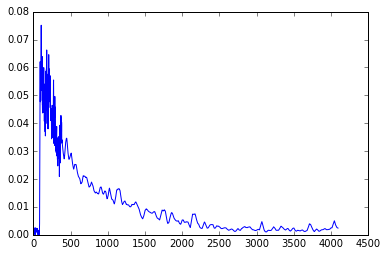

picked 1926 events!


In [43]:
print("Starts picking!")
picked = []

for i in range(len(energy)):
    if indices[i]==2:
        picked.append(i)

for i in range(20):
    k = np.random.randint(len(picked))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked[k]])
    plt.show()
print("picked",len(picked), "events!")

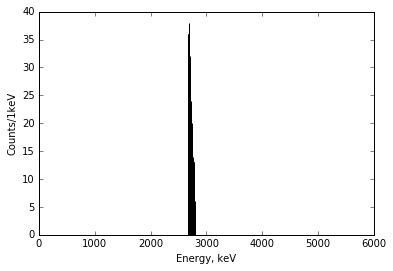

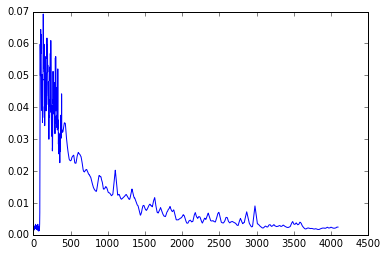

In [44]:
plt.figure()
plt.hist(energy[picked,1],bins=np.arange(0,6000,1))
plt.xlabel("Energy, keV")
plt.ylabel("Counts/1keV")
plt.savefig("refhisto.png")
plt.show()

plt.figure()
plt.plot(np.arange(4096),pmtall[picked[0]])
plt.savefig("refwaveform.png")
plt.show()

##### label = 3

Starts picking!


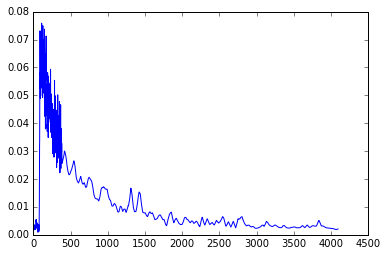

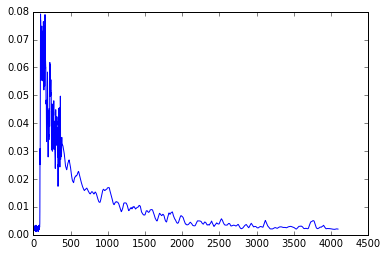

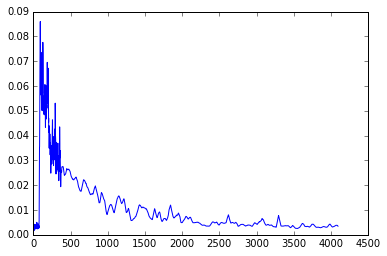

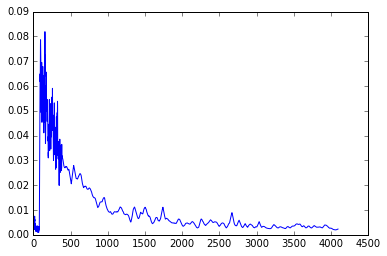

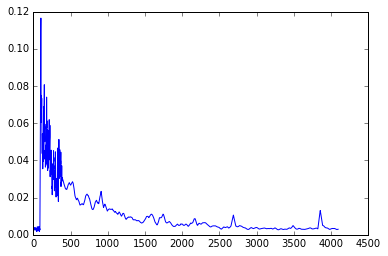

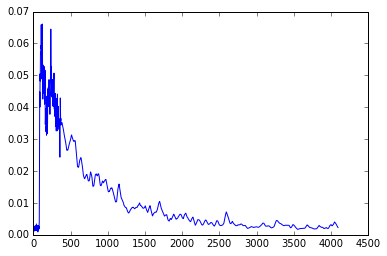

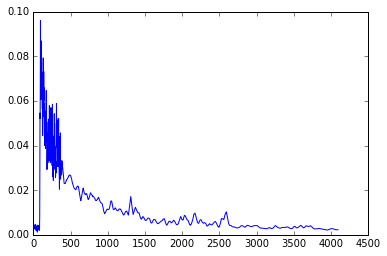

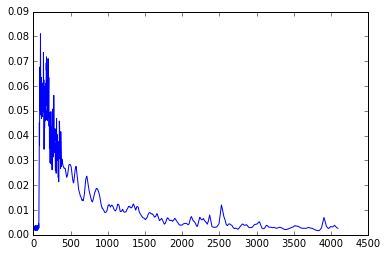

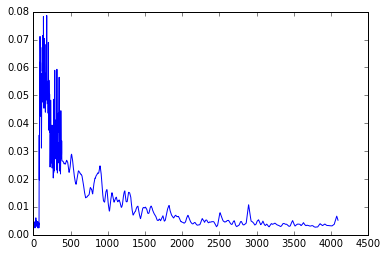

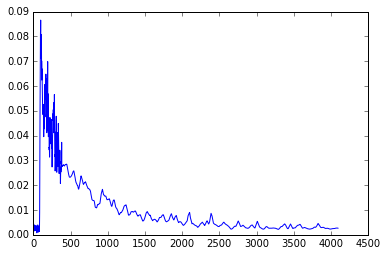

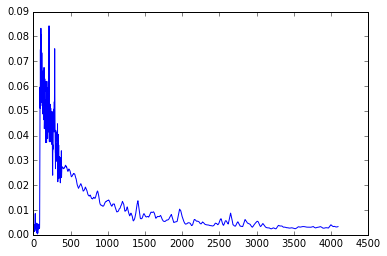

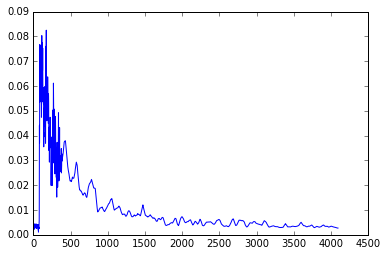

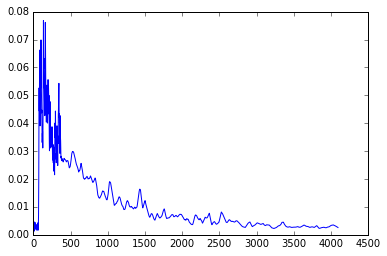

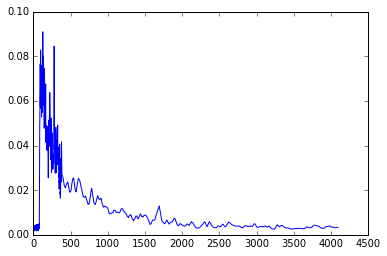

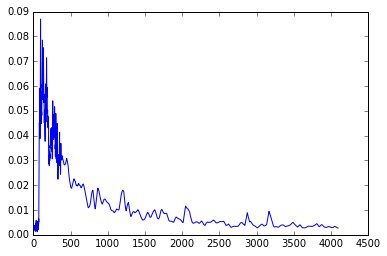

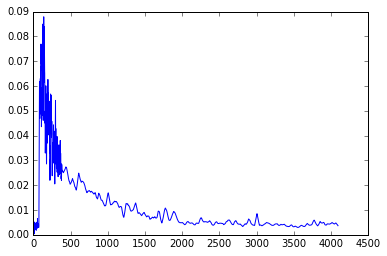

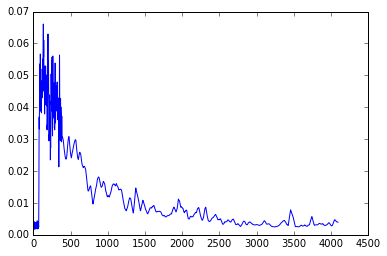

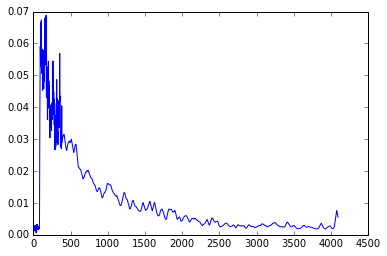

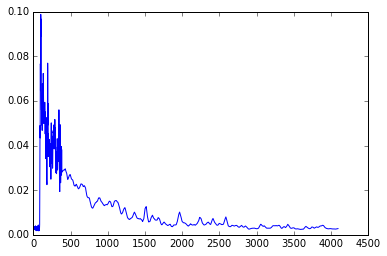

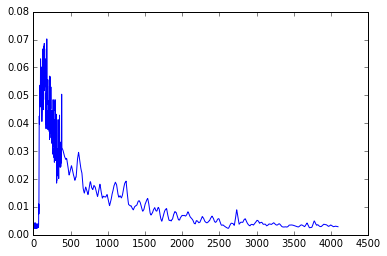

picked 966 events!


In [25]:
print("Starts picking!")
picked = []
for i in range(len(energy)):
    if indices[i]==3:
        picked.append(i)
for i in range(20):
    k = np.random.randint(len(picked))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked[k]])
    plt.show()
print("picked",len(picked), "events!")

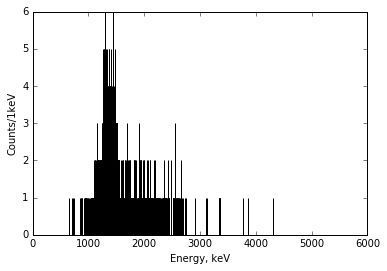

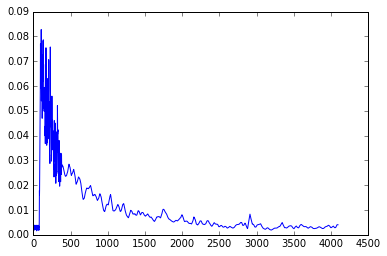

In [26]:
plt.figure()
plt.hist(energy[picked,1],bins=np.arange(0,6000,1))
# plt.yscale("log")
plt.xlabel("Energy, keV")
plt.ylabel("Counts/1keV")
plt.savefig("alphahisto.png")
plt.show()

plt.figure()
plt.plot(np.arange(4096),pmtall[picked[0]])
plt.savefig("alphawaveform.png")
plt.show()

##### label = 4

Starts picking!


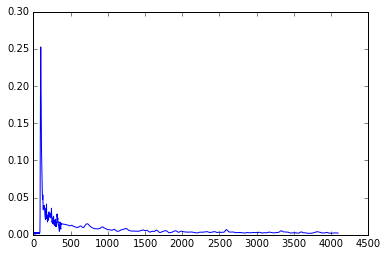

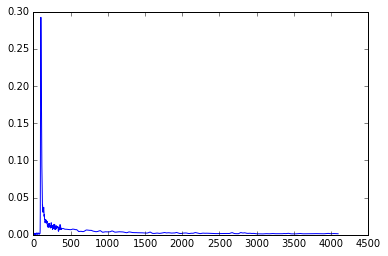

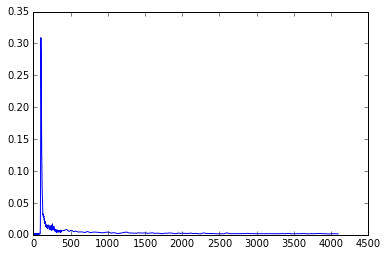

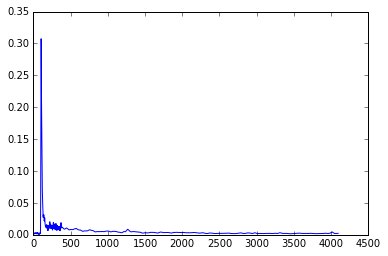

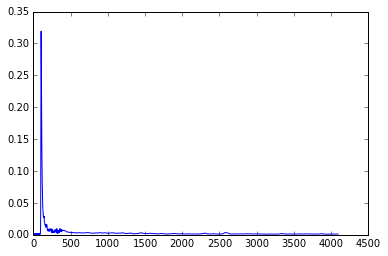

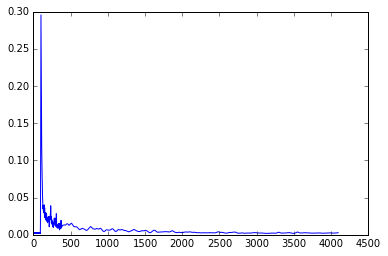

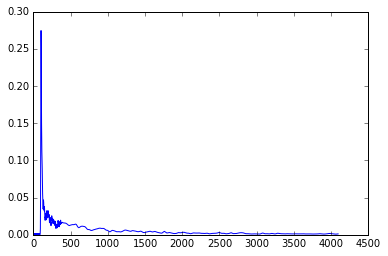

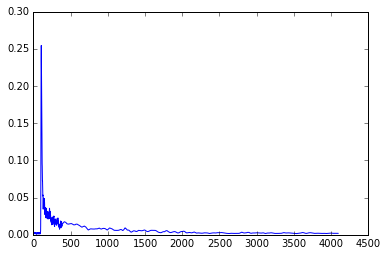

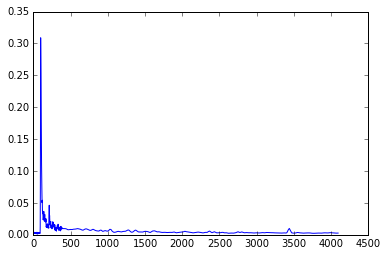

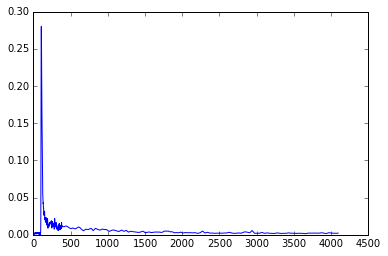

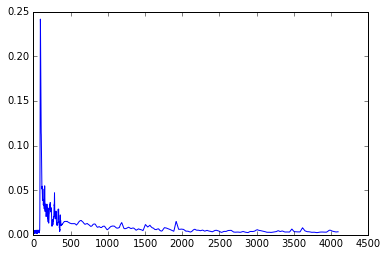

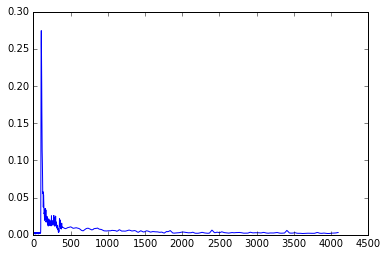

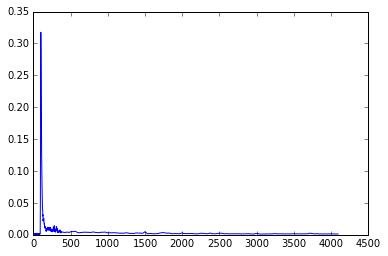

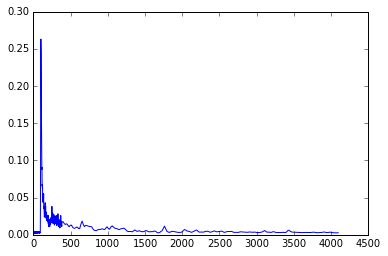

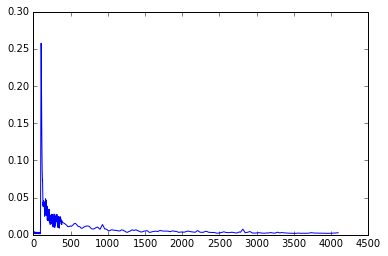

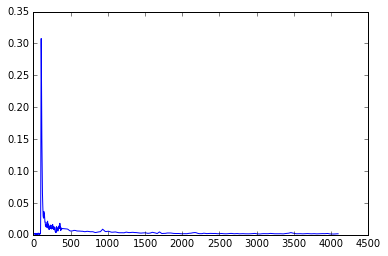

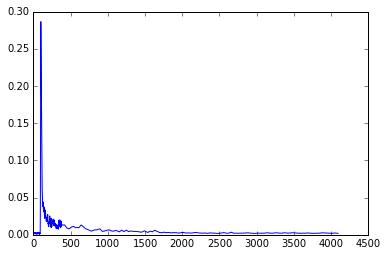

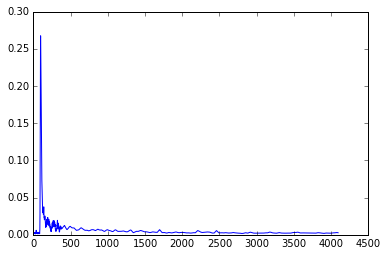

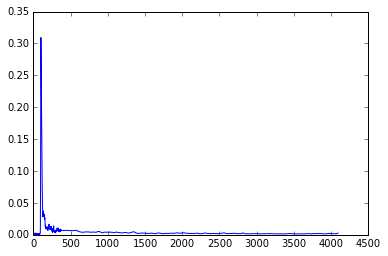

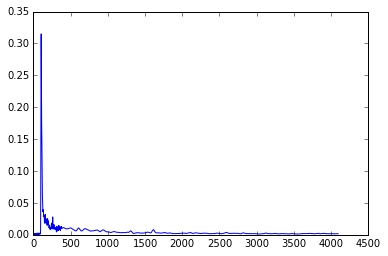

picked 8035 events!


In [27]:
print("Starts picking!")
picked = []
for i in range(len(energy)):
    if indices[i]==4:
        picked.append(i)
for i in range(20):
    k = np.random.randint(len(picked))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked[k]])
    plt.show()

print("picked",len(picked), "events!")

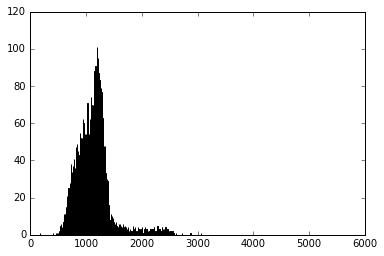

In [28]:
plt.figure()
plt.hist(energy[picked,1],bins=np.arange(0,6000,5))
# plt.yscale("log")
plt.show()

##### label = 5

Starts picking!


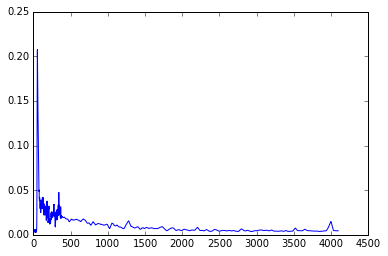

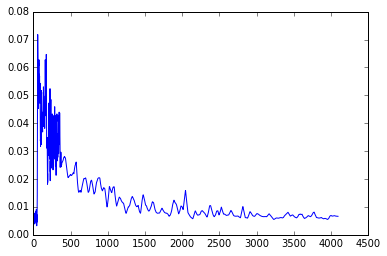

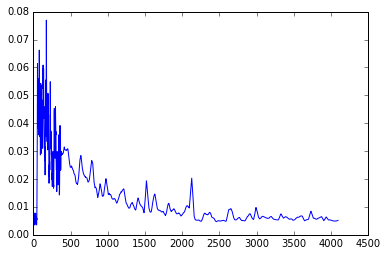

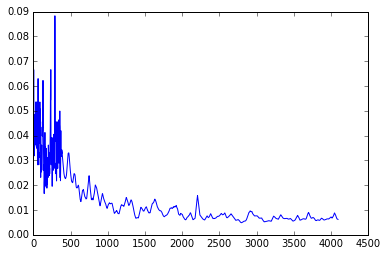

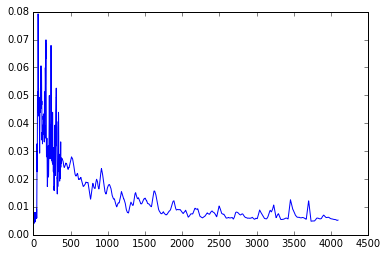

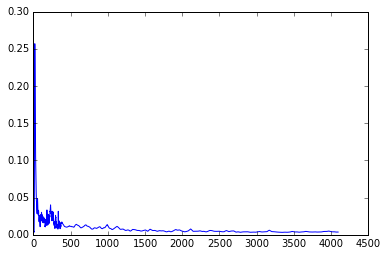

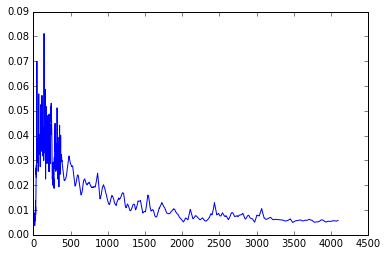

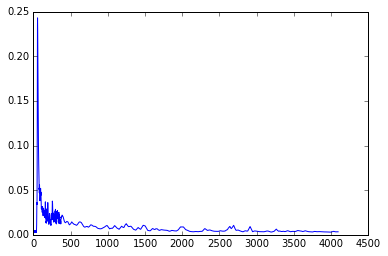

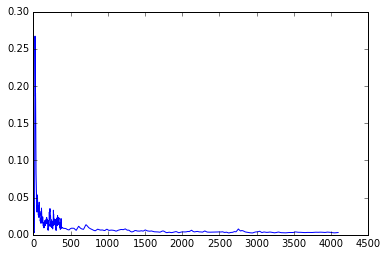

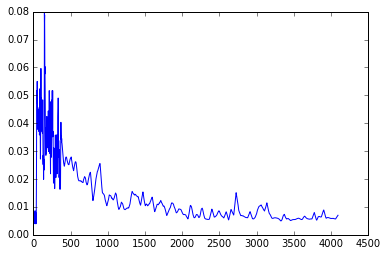

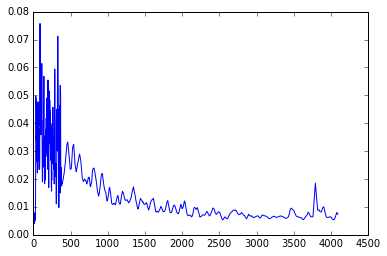

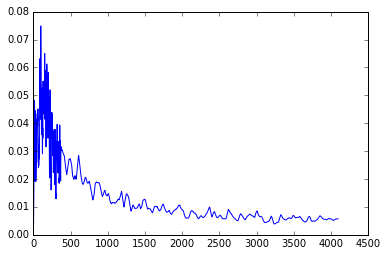

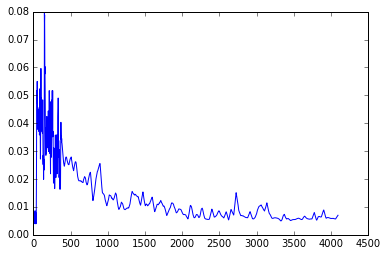

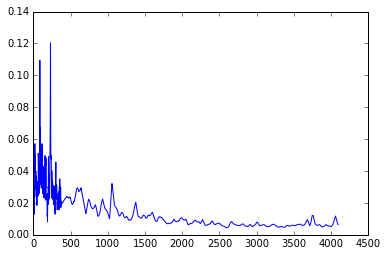

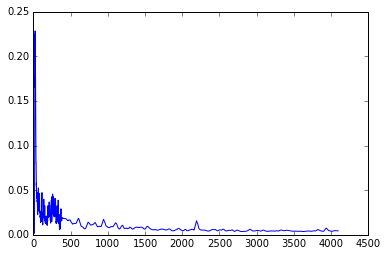

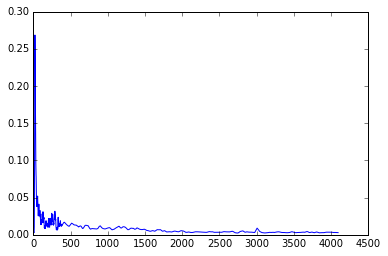

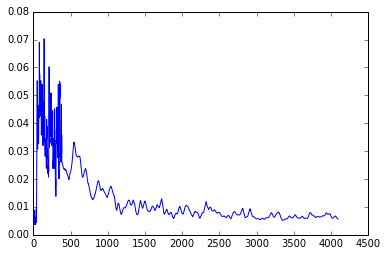

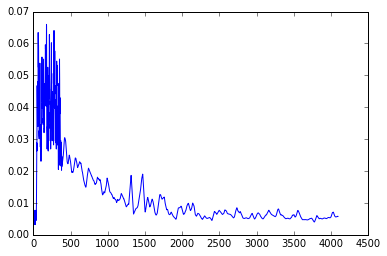

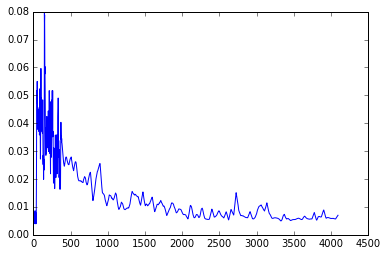

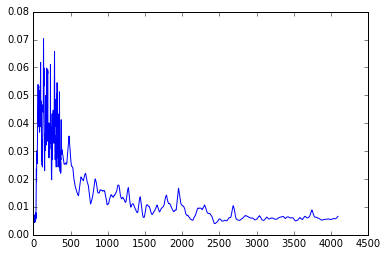

picked 499 events!


In [29]:
print("Starts picking!")
picked = []
for i in range(len(energy)):
    if indices[i]==5:
        picked.append(i)
for i in range(20):
    k = np.random.randint(len(picked))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked[k]])
    plt.show()

print("picked",len(picked), "events!")

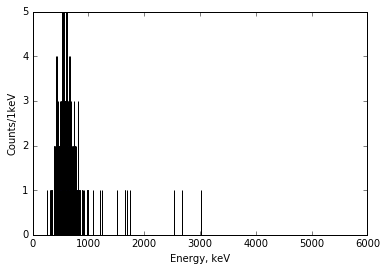

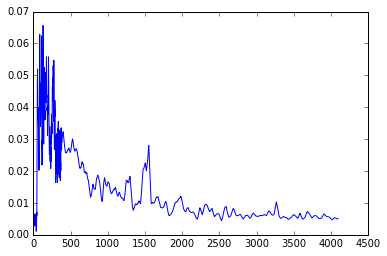

In [30]:
plt.figure()
plt.hist(energy[picked,1],bins=np.arange(0,6000,1))
# plt.yscale("log")
plt.xlabel("Energy, keV")
plt.ylabel("Counts/1keV")
plt.savefig("badhisto.png")
plt.show()

plt.figure()
plt.plot(np.arange(4096),pmtall[picked[0]])
plt.savefig("badwaveform.png")
plt.show()

##### label = 6

In [46]:
print("Starts picking!")
picked = []
for i in range(len(energy)):
    if indices[i]==6:
        picked.append(i)
for i in range(20):
    k = np.random.randint(len(picked))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked[k]])
    plt.show()

print("picked",len(picked), "events!")

Starts picking!


ValueError: low >= high

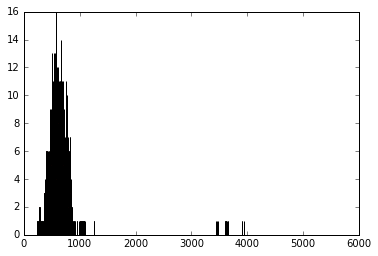

In [17]:
plt.figure()
plt.hist(energy[picked,1],bins=np.arange(0,6000,5))
# plt.yscale("log")
plt.show()

# Rewrite some portion

In [ ]:
%%time
# pmt_all_length = 4480

arguments = sys.argv
Run = arguments[0]
SubRun = arguments[1]
SubSubRun = arguments[2]

file = "Run{}/Run{}-{}-{}.root".format(Run,SubRun,SubSubRun)
data = "PMTALL"
tree = "tree"

pred = model.predict_generator(PMTALL,batch_size=200,verbose=1)


# output = open("DoubleP/Run{}-{}-{}.txt".format(Run,SubRun,SubSubRun), "w") 
# histo = ""

# def NORM(file, tree, data):
#     pmtall = read_root(file, tree, columns=[data],flatten=[data])
#     num_entries, w = pmtall.shape
#     num_entries = int(num_entries/pmt_all_length)
#     x = pmtall.PMTALL.values.reshape(num_entries, pmt_all_length)
#     x_abs = abs(x - 15200)
#     extra = np.arange(4160, pmt_all_length)
#     x_mod = np.delete(x_abs, extra, axis=1)
#     x_nor = normalize(x_mod, norm="l1")
#     return x_nor

# def read_para(x,tree,para):
#     ene = read_root(x, tree, columns=[para], flatten=[para])
#     num_entries, w = ene.shape
#     num_entries = int(num_entries/3)
#     y = ene.Energy.values.reshape(num_entries,3)
#     y_1 = np.expand_dims(y[:,1],axis=1)
#     y_1 = np.rint(y_1)
#     return y_1

from keras.models import load_model

model = load_model("CNN_d.h5")

PMTALL = NORM(file, tree, data)
# PMTALL = np.expand_dims(PMTALL,axis=2)
steps = len(PMTALL)
pred = model.predict_generator(PMTALL,batch_size=200,verbose=1)

del PMTALL

indices = np.argmax(pred,axis=1)

eventid = read_root(file, tree, columns=["EventID"], flatten=["EventID"])

energy = read_root(file, tree, columns=["Energy"],flatten=["Energy"])
l,h = energy.shape
li=int(l/3)
def reshape_Energy(x,n,l):
    return x.Energy.values.reshape(n,l)
energy = reshape_Energy(energy,li,3)
Energy = energy[:,1]

del energy

Energy = np.expand_dims(Energy, axis=1)
histogramming = np.array([])

for i in range(len(pred)):
    if indices[i]==0:
        output.write("{} {} {} {}".format(Run,SubRun,SubSubRun,EventID[i]))
        histogramming = np.concatenate((histogramming, Energy[i]), axis=0)
        
histogramming.to_root('Run{}-{}-{}.root'.format(Run,SubRun,SubSubRun), key='tree')
        
output.close()
